In [3]:
%matplotlib notebook
import numpy as np
import scipy

from scipy import sparse
from scipy.sparse import linalg
from numpy import pi, sin

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [4]:
%%time
def mu1(t):
    return np.zeros(t.shape)

def mu2(t):
    return np.zeros(t.shape)

def mu3(x):
    return np.sin(x)

def mu4(x):
    return np.zeros(x.shape)

def f(x,t):
    return np.zeros(x.shape)
c = 3
a = 6*pi
T = 10
tau = 0.01
h = 6*pi/100
x = np.arange(0, a+h, h)
t = np.arange(0, T+tau, tau)
sigma = 3.0/8.0

diff_op_x = np.zeros((len(x),len(x)))
for n in range(1, len(x)-1):
    diff_op_x[n][n-1] = 1
    diff_op_x[n][n] = -2
    diff_op_x[n][n+1] = 1
diff_op_x = (tau*c/h)**2 * diff_op_x
diff_op_x[0,:] = np.zeros(diff_op_x[0,:].shape)
diff_op_x[-1,:] = np.zeros(diff_op_x[-1,:].shape)
diff_op_x = sparse.csc_matrix(diff_op_x)

u = np.zeros((len(t), len(x)))
u[0,:] = mu3(x)
u[:,-1] = mu2(t)
u[:,0] = mu1(t)
u[1,:] = u[0,:] + tau * mu4(x) + (np.squeeze(diff_op_x*np.matrix(mu3(x)).T) + tau**2*f(x,t))/2.0
p = scipy.linalg.inv(np.eye(len(x)) - sigma*diff_op_x)
for i in range(2,len(t)):
    u[i] = np.squeeze(p*diff_op_x*(np.matrix(u[i-1]).T)) + 2*u[i-1] - u[i-2]

Wall time: 206 ms


<IPython.core.display.Javascript object>


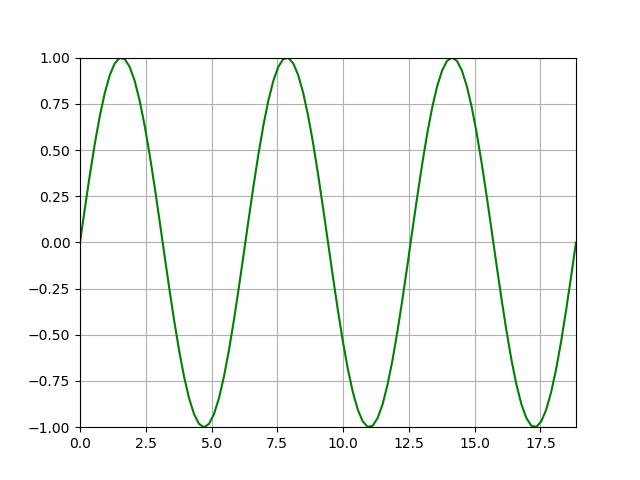

In [5]:
from matplotlib import pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots()
ax.set_xlim(0,100)
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in u]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in u]
maxv=max(maxv)
ax.set_xlim(0,6*pi)
ax.set_ylim(minv,maxv)
ax.grid(True)
line, = plt.plot(x, u[0], color='g')
def animate(n):
    line.set_data(x, u[n])
    return line,
anim = animation.FuncAnimation(fig, animate, frames=u.shape[0], interval=50,repeat = True)
plt.show()

In [6]:
%%time
def mu3(x):
    return np.sin( x * (1 + 0.1*np.exp( -(x-10)**2 )) )

def mu1(t):
    return np.zeros(t.shape)

def mu2(t):
    return np.zeros(t.shape)

def mu4(x):
    return np.zeros(x.shape)

def f(x,t):
    return np.zeros(x.shape)

c = 3
a = 6*pi
T = 10
tau = 0.01
h = 6*pi/100
x = np.arange(0, a+h, h)
t = np.arange(0, T+tau, tau)
sigma = 3/8

diff_op_x = np.zeros((len(x),len(x)))
for n in range(1, len(x)-1):
    diff_op_x[n][n-1] = 1
    diff_op_x[n][n] = -2
    diff_op_x[n][n+1] = 1
diff_op_x = (tau*c/h)**2 * diff_op_x
diff_op_x[0,:] = np.zeros(diff_op_x[0,:].shape)
diff_op_x[-1,:] = np.zeros(diff_op_x[-1,:].shape)
diff_op_x = sparse.csc_matrix(diff_op_x)

u = np.zeros((len(t), len(x)))
u[0,:] = mu3(x)
u[:,-1] = mu2(t)
u[:,0] = mu1(t)
u[1,:] = u[0,:] + tau * mu4(x) + (np.squeeze(diff_op_x*np.matrix(mu3(x)).T) + tau**2*f(x,t))/2.0
p = scipy.linalg.inv(np.eye(len(x)) - sigma*diff_op_x)
for i in range(2,len(t)):
    u[i] = np.squeeze(p*diff_op_x*(np.matrix(u[i-1]).T)) + 2*u[i-1] - u[i-2]

Wall time: 191 ms


In [7]:
from matplotlib import pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots()
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in u]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in u]
maxv=max(maxv)
ax.set_xlim(0,6*pi)
ax.set_ylim(minv,maxv)
ax.grid(True)
line, = plt.plot(x, u[0], color='g')
def animate(n):
    line.set_data(x, u[n])
    return line,
anim = animation.FuncAnimation(fig, animate, frames=u.shape[0], interval=100)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


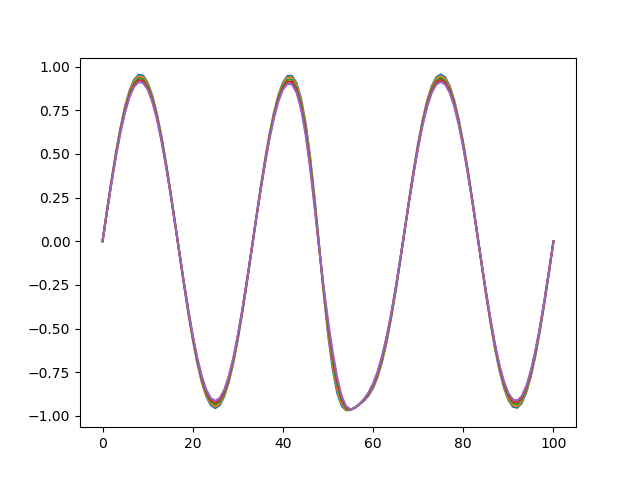

In [8]:
plt.figure()
for i in range(10,15):
    plt.plot(u[i])


In [9]:
%%time
import numpy as np
from numpy import pi

def mu3(x):
    return np.sin( x * (1 + 0.1*np.exp( -(x-10)**2 )))

def mu1(t):
    return mu3(0)*np.ones(t.shape)

def mu2(t):
    return mu3(x[-1])*np.ones(t.shape)

def mu4(x):
    return np.zeros(x.shape)

def f(x,t):
    return np.zeros(x.shape)

c = 3
a = 6*pi
T = 10
tau = 1/16
h = 6*pi/16
sigma = 3.0/8.0
sols = []

for j in range(7):
    print("Iteration:",j)
    x = np.arange(0, a+h, h)
    t = np.arange(0, T+tau, tau)
    diff_op_x = np.zeros((len(x),len(x)))
    for n in range(1, len(x)-1):
        diff_op_x[n][n-1] = 1
        diff_op_x[n][n] = -2
        diff_op_x[n][n+1] = 1
    diff_op_x = (tau*c/h)**2 * diff_op_x
    diff_op_x[0,:] = np.zeros(diff_op_x[0,:].shape)
    diff_op_x[-1,:] = np.zeros(diff_op_x[-1,:].shape)
    diff_op_x = sparse.csc_matrix(diff_op_x)

    u = np.zeros((len(t), len(x)))
    u[0,:] = mu3(x)
    u[:,-1] = mu2(t)
    u[:,0] = mu1(t)
    u[1,:] = u[0,:] + tau * mu4(x) + (np.squeeze(diff_op_x*np.matrix(mu3(x)).T) + tau**2*f(x,t))/2.0
    #p = scipy.linalg.inv(np.eye(len(x)) - sigma*diff_op_x)
    p = scipy.sparse.linalg.spsolve(sparse.csc_matrix(np.eye(len(x)) - sigma*diff_op_x),sparse.csc_matrix(np.eye(len(x))))
    for i in range(2,len(t)):
        u[i] = np.squeeze(p*diff_op_x*(np.matrix(u[i-1]).T)) + 2*u[i-1] - u[i-2]
    
    tau = tau/2.0
    h = h/2.0
    sols.append(u)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Wall time: 1min 4s


In [ ]:
def effective_p(U4N,U2N,UN):
    p1 = max(abs((U4N[::2,::2]-U2N).flatten()))
    p2 = max(abs((U2N[::2,::2]-UN).flatten()))
    return - np.log2(p1/p2)

In [ ]:
plt.figure()
plt.plot([effective_p(sols[i+2],sols[i+1],sols[i]) for i in range(5)])